<a href="https://colab.research.google.com/github/Karlajack/Machine_Learning_24e/blob/main/ML1_Capstone-KidneyDisease_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KIDNEY DISEASE CLASSIFICATION PROJECT**

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.

# Importing necessary Libraries and Data

In [123]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline
import random

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.svm import LinearSVR,SVR,NuSVR,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [63]:
#Importing data
df = pd.read_csv("/content/kidney_disease.csv")
df.head(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd


In [75]:
#Renaming columns in the dataset with their correct names
df =df.rename(columns={'classification': 'target_variable'})
df.head(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target_variable
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd


# **Exploratory Data Analysis and Data Preprocessing**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               400 non-null    int64  
 1   age              391 non-null    float64
 2   bp               388 non-null    float64
 3   sg               353 non-null    float64
 4   al               354 non-null    float64
 5   su               351 non-null    float64
 6   rbc              248 non-null    object 
 7   pc               335 non-null    object 
 8   pcc              396 non-null    object 
 9   ba               396 non-null    object 
 10  bgr              356 non-null    float64
 11  bu               381 non-null    float64
 12  sc               383 non-null    float64
 13  sod              313 non-null    float64
 14  pot              312 non-null    float64
 15  hemo             348 non-null    float64
 16  pcv              330 non-null    object 
 17  wc              

In [56]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


**Exploring Missingness**

In [9]:
#Missingness
missingness=df.isnull().sum().sort_values(ascending=False)
missingness



rbc                152
rc                 130
wc                 105
pot                 88
sod                 87
pcv                 70
pc                  65
hemo                52
su                  49
sg                  47
al                  46
bgr                 44
bu                  19
sc                  17
bp                  12
age                  9
ba                   4
pcc                  4
htn                  2
dm                   2
cad                  2
ane                  1
appet                1
pe                   1
id                   0
target_variable      0
dtype: int64

Text(0.5, 1.0, 'missingness values')

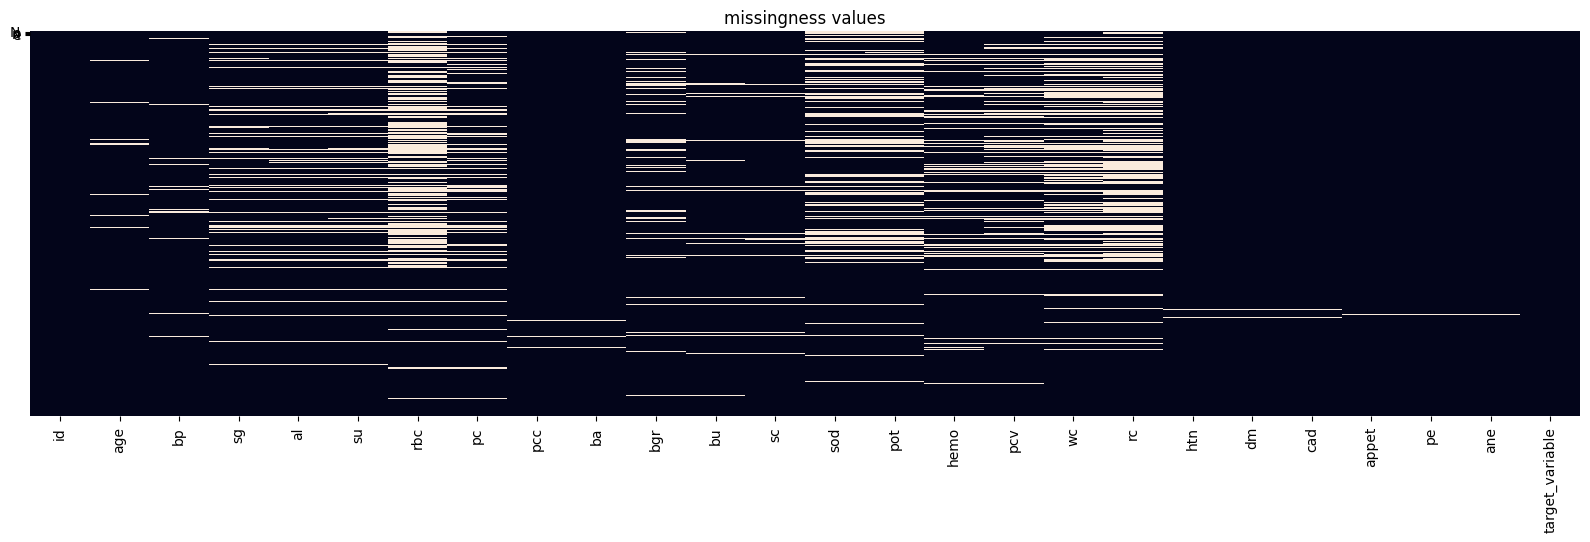

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels="None",cbar=False)
plt.title("missingness values")

In [11]:
Total_Records=df.isnull().count().sort_values(ascending=False)
Total_Records

id                 400
age                400
ane                400
pe                 400
appet              400
cad                400
dm                 400
htn                400
rc                 400
wc                 400
pcv                400
hemo               400
pot                400
sod                400
sc                 400
bu                 400
bgr                400
ba                 400
pcc                400
pc                 400
rbc                400
su                 400
al                 400
sg                 400
bp                 400
target_variable    400
dtype: int64

In [13]:
percent_missingness=missingness/Total_Records*100

missing_data=pd.concat([missingness,percent_missingness],axis=1,keys=['missingness','percent_missingness'],sort=False)

missing_data.index.name='variable'

missing_data=missing_data[missing_data['missingness']>0]
missing_data.head(10)

,missingness,percent_missingness
variable,,
rbc,152,38.00
rc,130,32.50
wc,105,26.25
pot,88,22.00
sod,87,21.75
pcv,70,17.50
pc,65,16.25
hemo,52,13.00
su,49,12.25


The are no features that have more than 50% missingness.The best strategy is to maintain all features and address the missingness by imputation

**Handling Missingness**

In [77]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               400 non-null    int64  
 1   age              391 non-null    float64
 2   bp               388 non-null    float64
 3   sg               353 non-null    float64
 4   al               354 non-null    float64
 5   su               351 non-null    float64
 6   rbc              248 non-null    object 
 7   pc               335 non-null    object 
 8   pcc              396 non-null    object 
 9   ba               396 non-null    object 
 10  bgr              356 non-null    float64
 11  bu               381 non-null    float64
 12  sc               383 non-null    float64
 13  sod              313 non-null    float64
 14  pot              312 non-null    float64
 15  hemo             348 non-null    float64
 16  pcv              330 non-null    object 
 17  wc              

**Imputing missing values**

In [78]:
# Separating the dataset between Categorical and Numerical variables
CatVar = data.select_dtypes(include=['object']).columns
NumVar = data.select_dtypes(include=['float64','int64']).columns

num_cols=data[NumVar]
categorical_cols=data[CatVar]




In [79]:
# Imputing Numerical columns impute with median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
data[NumVar] = imp_median.fit_transform(num_cols)
# Imputing Categorical columns impute with mode
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data[CatVar]= imp_mode.fit_transform(categorical_cols )


In [80]:
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target_variable
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Numerical Features Correlation

In [ ]:
#corr_df=data[NumVar].corr()
#corr_df.head(2)
#fig,ax=plt.subplots(figsize=(14,14))
#sns.heatmap(corr_df,annot=True,cmap='viridis')


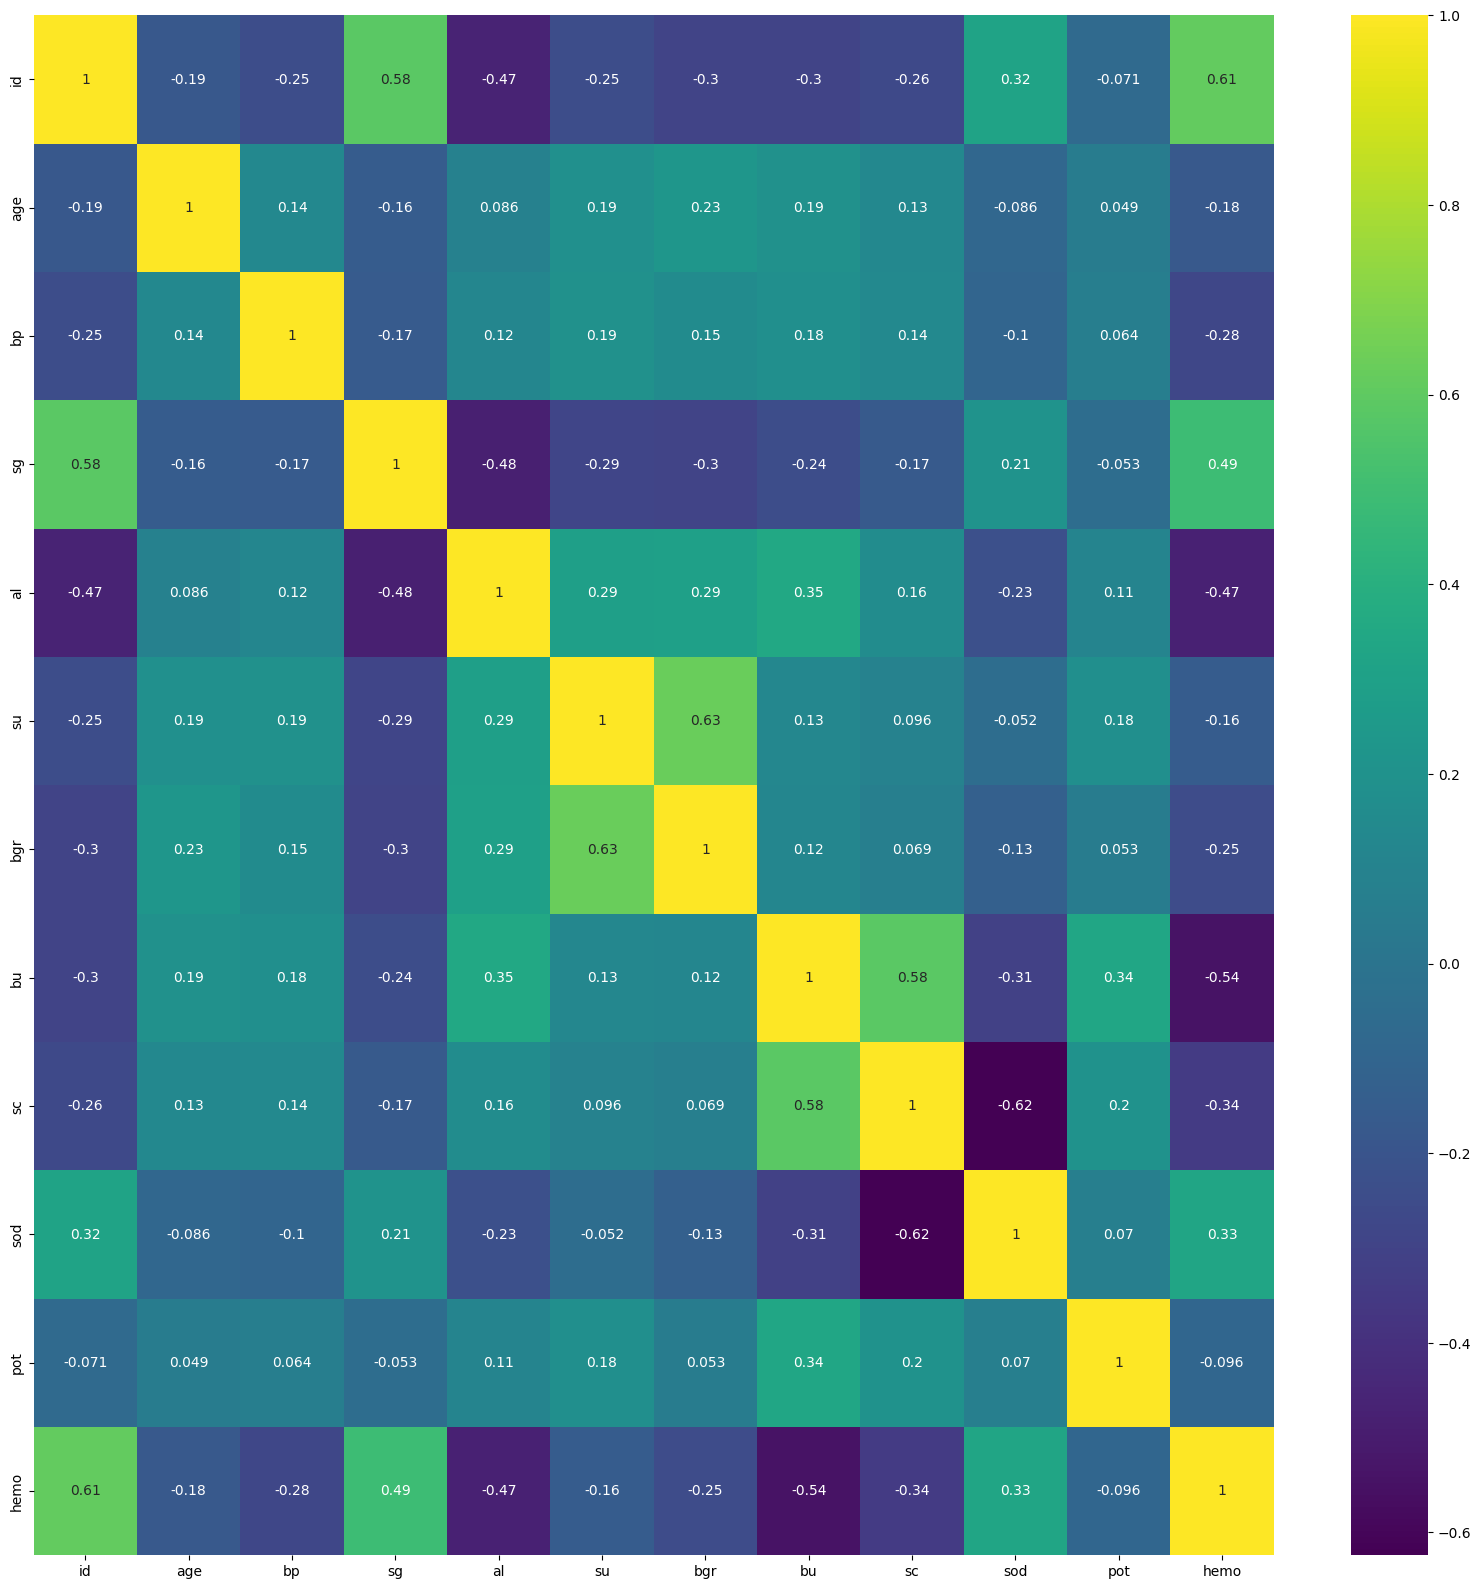

In [68]:
#correlation matrix
corrmat = data[NumVar].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[NumVar][top_corr_features].corr(),annot=True,cmap="viridis")



There are no high multicolleniarity between the features

#**Encoding**

In [86]:
#categorical columns
# Label Encoding for object to numeric conversion

le = LabelEncoder()

for feature in data[CatVar]:
    data[feature] = le.fit_transform(data[feature].astype(str))

In [95]:
# Checking class imbalance
data['target_variable'].value_counts()

target_variable
0    250
1    150
Name: count, dtype: int64

<Axes: >

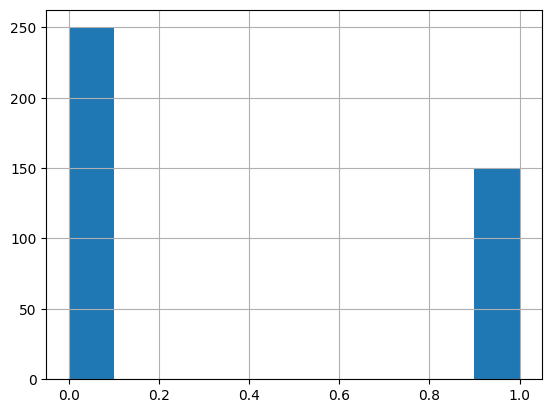

In [94]:
data['target_variable'].hist()

In [98]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target_variable
0,0.0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,26,70,25,1,4,1,0,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,19,52,25,0,3,1,0,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,11,68,25,0,4,1,1,0,1,0
3,3.0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,13,59,10,1,3,1,1,1,1,0
4,4.0,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,16,65,18,0,3,1,0,0,0,0


# linear separabillity of the two classes-- Bivariate analysis using scatter plots

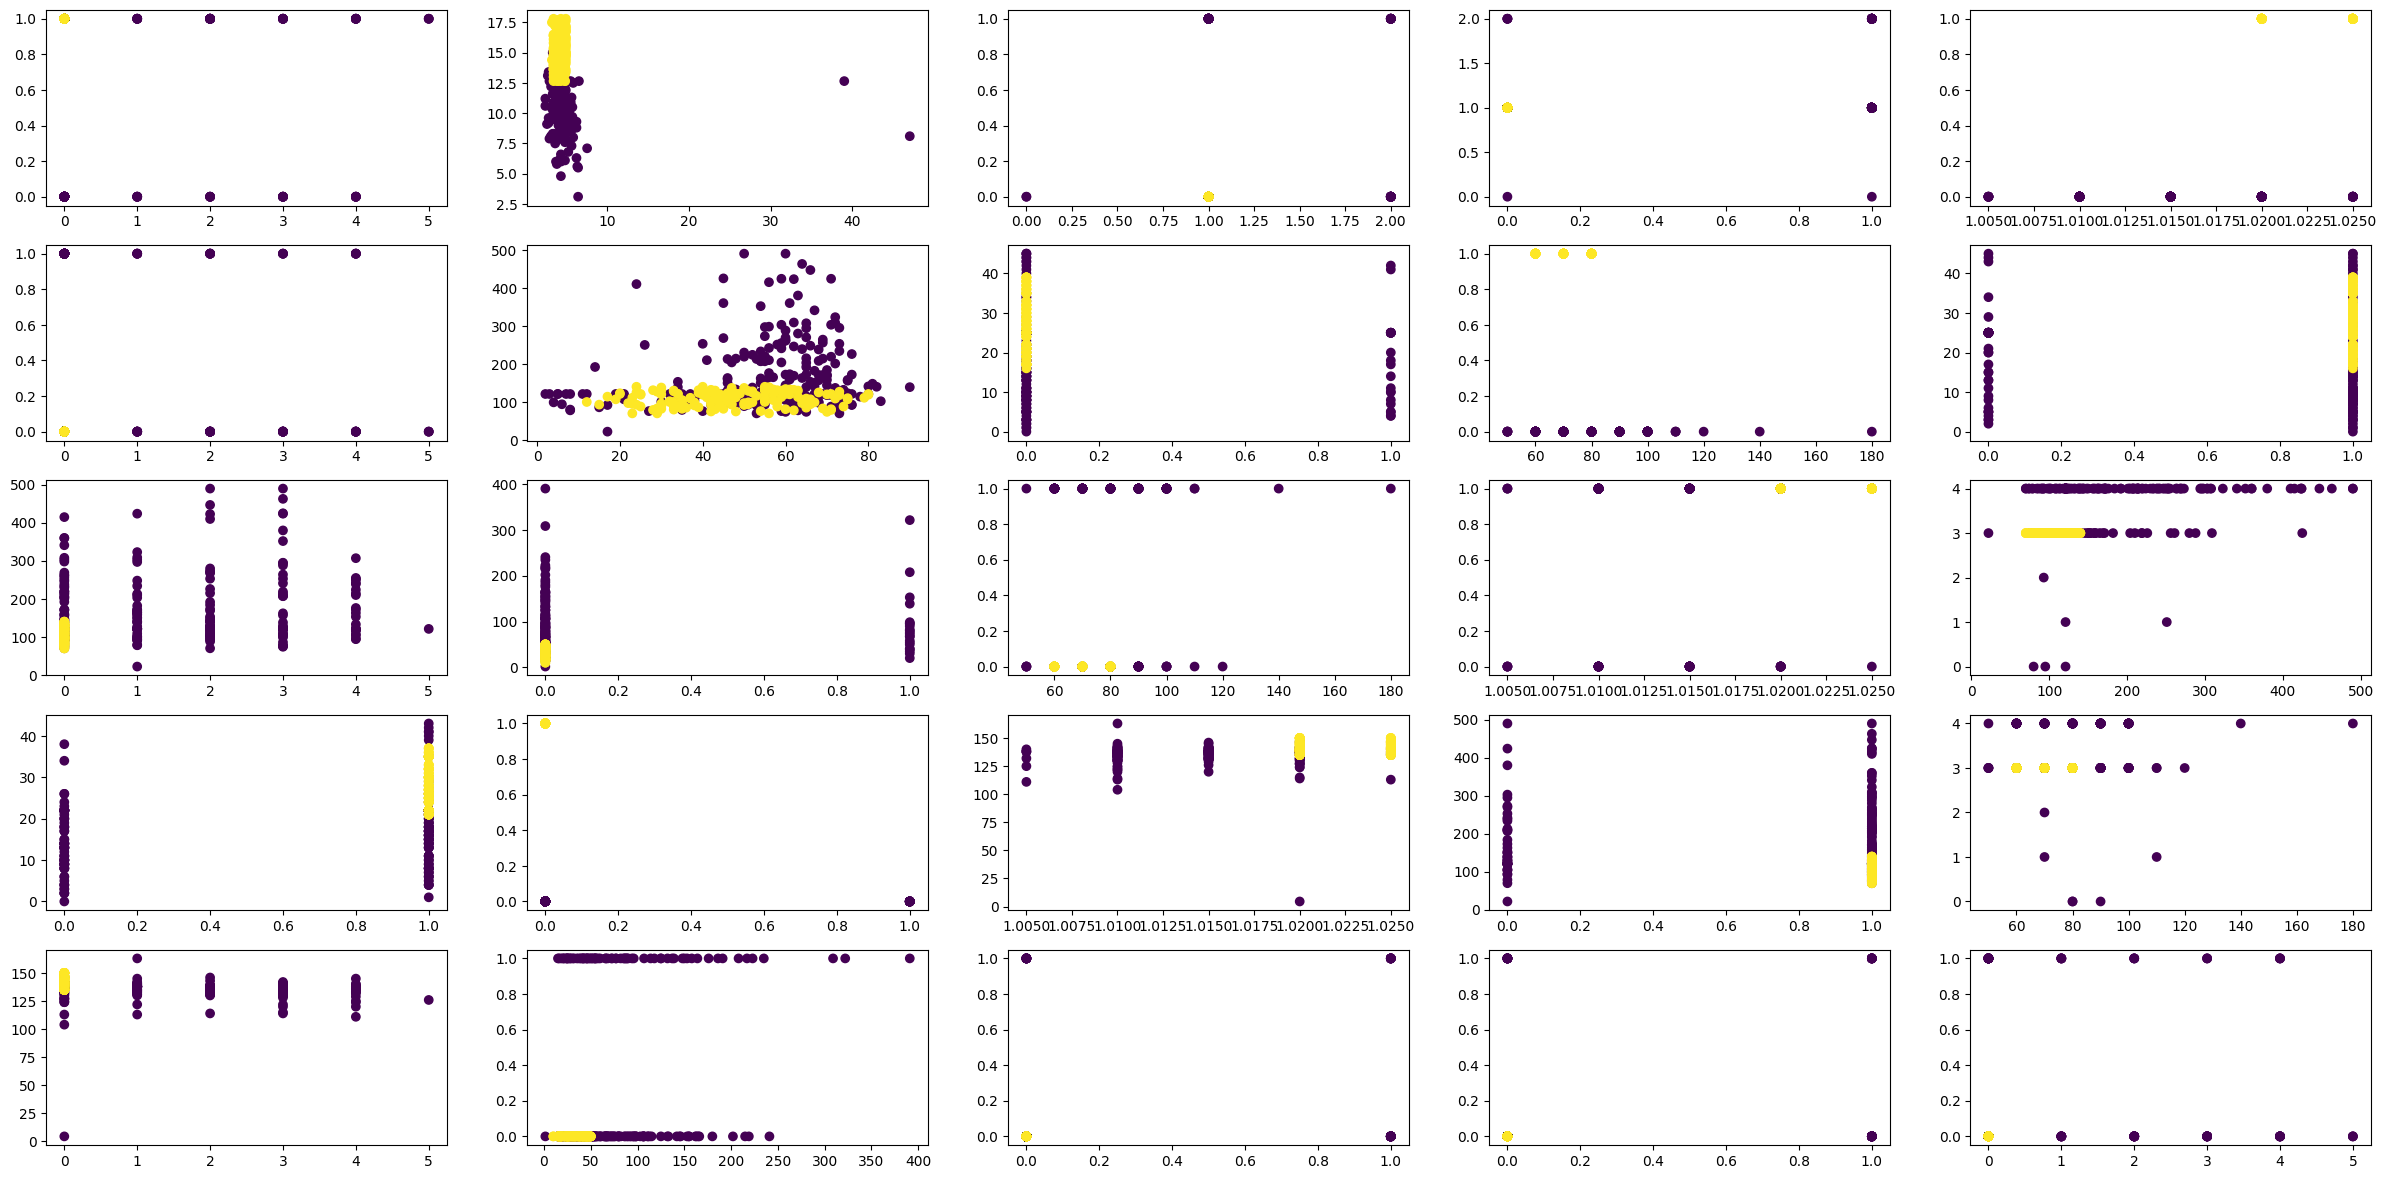

In [170]:
comb = list(itertools.combinations([a for a in range(1, len(data.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=25) #Randomly choose 30 bivariate relationships to visualise. Total bivariate relationships (4060 = 30C3) is too much
fig = plt.figure(figsize=(30,30))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(data[data.columns[rand[i][0]]],data[data.columns[rand[i][1]]],c=data['target_variable'],cmap='viridis')

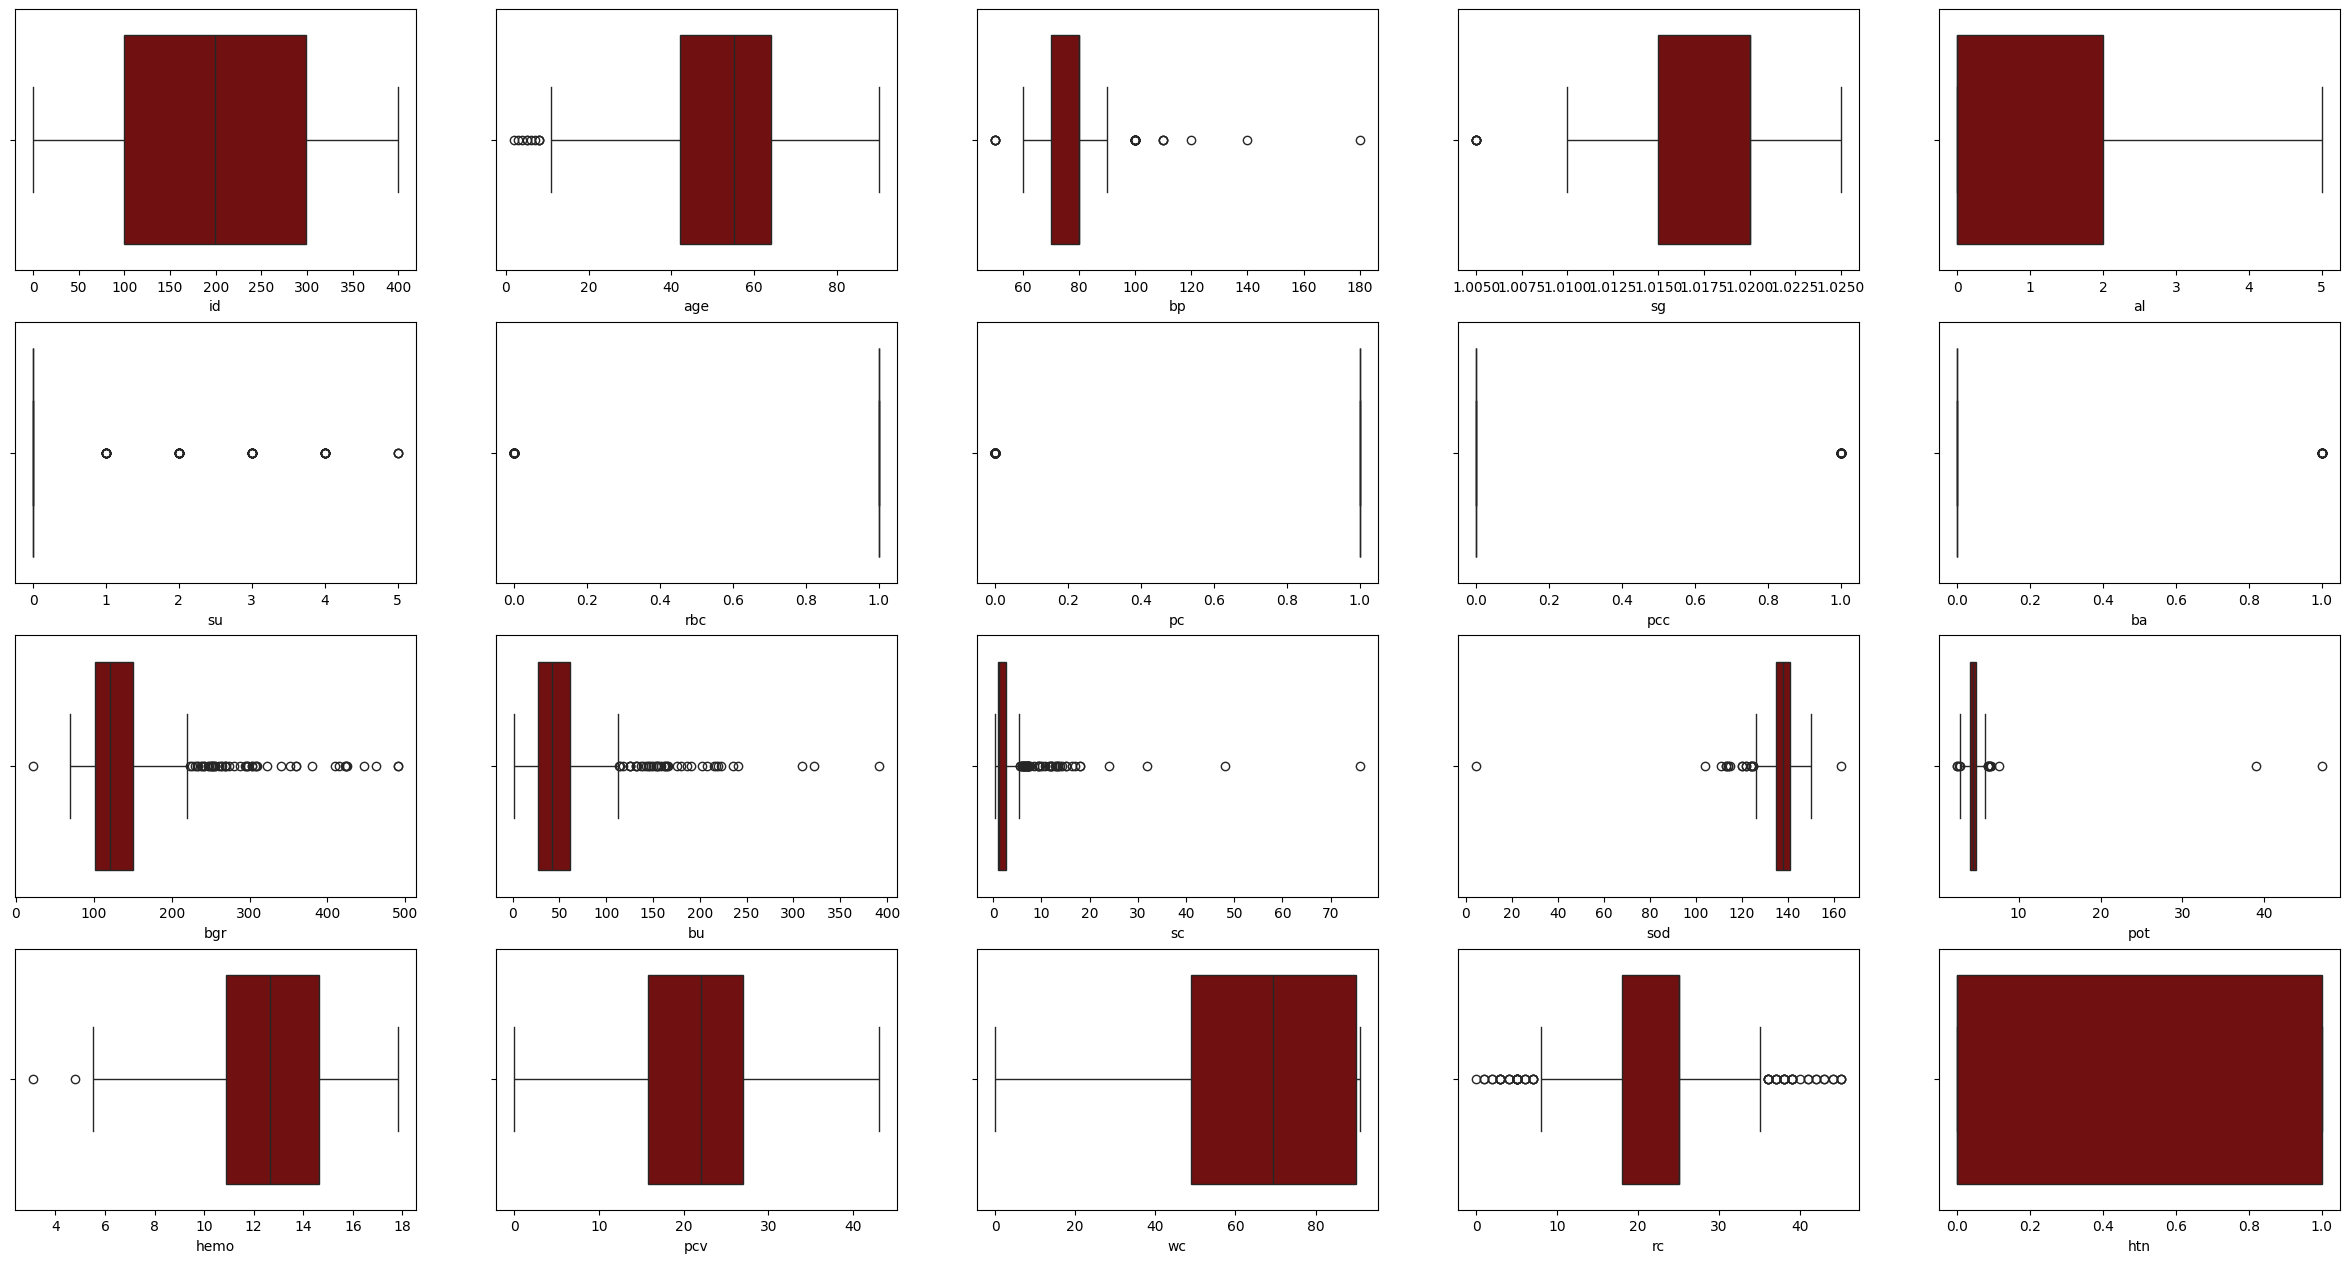

In [169]:
#univariate analysis for numerical features to check outliers
fig=plt.figure(figsize=(30,40))
for i,j in zip(data,range(20)):
  ax=fig.add_subplot(10,5,j+1)
  sns.boxplot(data=data,x=data[i],orient='v',color='Maroon')



Insights Most features are not linearly separable for classification problem

Support vector machines and ensemble methods would be best models for this data



In [ ]:
#Separating features and target
x=data.drop(['customer_id','target_variable'],axis=1)
y=data[["target_variable"]]

# **MODELLING**

# Modelling with unbalance data

In [124]:
#Separating features and target
x=data.drop(['id','target_variable'],axis=1)
y=data[["target_variable"]]

In [125]:
# Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 24) (80, 24) (320, 1) (80, 1)


# Hyparameter Tuning

In [126]:
# Define the model
model=RandomForestClassifier()
#Define parameter grid
param_grid= {'n_estimators':[10,15,20],
             'max_depth':[5,10,15],
             'max_features':[10,15,26],
             'criterion':['entropy','gini']}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring="accuracy")

#fit the model
grid_search.fit(x_train,y_train)

# best parameter and best scores
print("Best_parameter:", grid_search.best_params_)
print("Best_Score:", grid_search.best_score_)

Best_parameter: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 15}
Best_Score: 0.99375


In [144]:
# Define the model
model=SVC()
#Define parameter grid
param_grid= {'C':[5,10,15],
             'kernel': ['poly','rbf','sigmoid'],
             'degree':[1,2,3],
             'gamma':['scale','auto']}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring="accuracy")

#fit the model
grid_search.fit(x_train,y_train)

# best parameter and best scores
print("Best_parameter:", grid_search.best_params_)
print("Best_Score:", grid_search.best_score_)

Best_parameter: {'C': 5, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best_Score: 0.95625


**Fitting and prediction with optimal Model**

In [145]:
## Choose your best model (with the optimal parameters) and fit it with the entire train dataset
model =make_pipeline(RandomForestClassifier(criterion='entropy', max_depth= 10, max_features= 10, n_estimators= 15)).fit(x_train,y_train)

#Make predictions using fitted model
y_pred=model.predict(x_test)
y_pred.shape

(80,)

In [146]:
## Use the confusion matrix to visualize the precision and recall
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])


print (classification_report(y_test, y_pred, labels=[1,0]))





              precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           0       1.00      0.98      0.99        56

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# **Modelling with Balanced data**

In [132]:
! pip install imblearn

In [147]:
from collections import Counter
from imblearn.over_sampling import SMOTE

array([[<Axes: title={'center': 'target_variable'}>]], dtype=object)

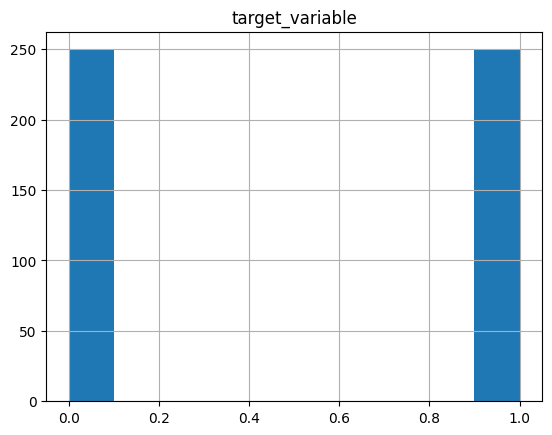

In [148]:
# Smote
smote_sample=SMOTE(random_state=130,sampling_strategy='auto')
x_res, y_res=smote_sample.fit_resample(x,y)


# plot the classes
y_res.hist()

In [149]:
print(x_res.shape,y_res.shape)

(500, 24) (500, 1)


In [151]:
# Train Test split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_res,y_res, test_size = 0.2, random_state = 40)



#Hyparamenter tuning with balanced data

In [154]:
#Define the model
model2=RandomForestClassifier()
#Define parameter grid
param_grid= {'n_estimators':[10,15,20],
             'max_depth':[5,10,15],
             'max_features':[10,15,26],
             'criterion':['entropy','gini']}

grid_search=GridSearchCV(estimator=model2,param_grid=param_grid,cv=5,scoring="accuracy")

#fit the model
grid_search.fit(x_train2,y_train2)

# best parameter and best scores
print("Best_parameter:", grid_search.best_params_)
print("Best_Score:", grid_search.best_score_)

Best_parameter: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'n_estimators': 20}
Best_Score: 0.9949999999999999


In [153]:
## model (with the optimal parameters) and fit it with the entire balanced dataset
model=make_pipeline(PolynomialFeatures(degree=2),MinMaxScaler(),RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy',max_features=10))
scores=cross_val_score(model,x_train2,y_train2,cv=5,scoring="accuracy")
# Fitting the model
model.fit(x_train2, y_train2)

print(scores,scores.mean())

[1.     0.9875 0.975  1.     1.    ] 0.9925


In [155]:
y_pred2=model.predict(x_test2)
y_pred2.shape


(100,)

In [156]:
# Use the confusion matrix to visualize the precision and recall for balanced dataset
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test2, y_pred2, labels=[1,0])


print (classification_report(y_test2, y_pred2, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        50
           0       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# **FEATURE IMPORTANCE**

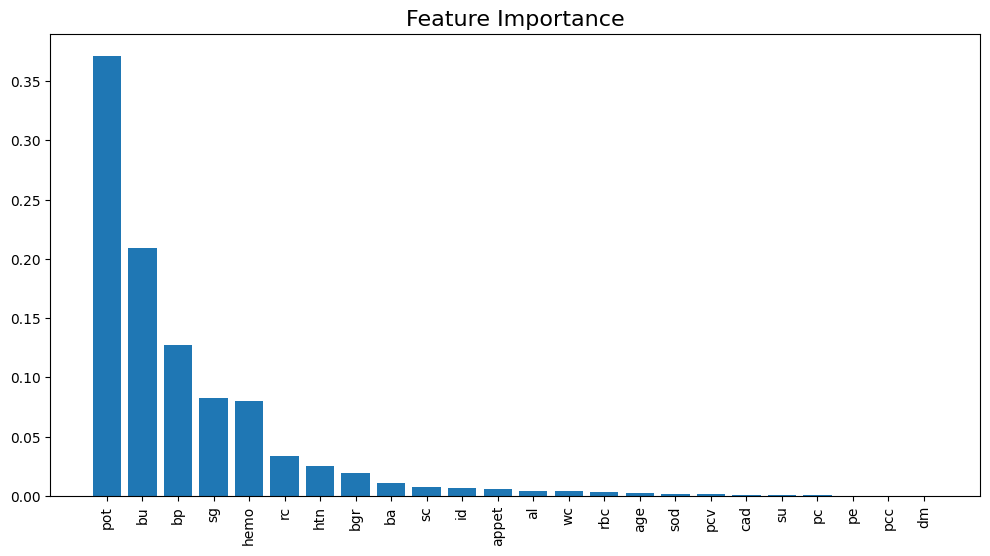

In [179]:
from sklearn.preprocessing import  RobustScaler, FunctionTransformer
# Build random forest classifier
clf = RandomForestClassifier(n_estimators=100,
                                max_features=10,
                                criterion="gini",
                                class_weight="balanced")

from sklearn.preprocessing import RobustScaler
# fit to plot feature importances
clf.fit(RobustScaler().fit_transform(x_train), y_train)

# Plot features importance
importances = clf.feature_importances_
indices = np.argsort(clf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 25), importances[indices], align="center")
plt.xticks(range(1, 25), data.columns[data.columns != "target_variable"][indices], rotation=90)
plt.title("Feature Importance", {"fontsize": 16});